In [4]:
import rdflib
import csv
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import pprint


wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")
#we do not need to use sparqlwrapper wikidata endpoint!

# create an empty Graph
g = rdflib.ConjunctiveGraph()

# parse a local RDF file by specifying the format
result = g.parse("resources/artchives.nq", format='nquads')

query_keepers = g.query('''
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wdp: <http://www.wikidata.org/wiki/Property:>
PREFIX art: <https://w3id.org/artchives/>
PREFIX wd: <http://www.wikidata.org/entity/>
SELECT DISTINCT ?nameCountry ?periodLabel
WHERE {
  ?coll wdt:P170 ?historian ;
      art:hasSubjectPeriod ?period .
  ?historian a wd:Q5;
     wdt:P27 ?paese.
 ?paese rdfs:label ?nameCountry .
 ?period rdfs:label ?periodLabel . 
}
GROUP BY ?nameCountry ?periodLabel

''') 
#this is the country in which the Keeper (institute) is located! 

with open('countries_his.csv', 'wt') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
    csv_writer.writerow(["nameCountry", "periodLabel"])
    # access the rows of the query results
    for nameCountry, periodLabel in query_keepers:
        # write in the csv
        csv_writer.writerow([nameCountry.strip(), periodLabel.lower().strip()])        

        
import pandas as pd
data = pd.read_csv('countries_his.csv', encoding = 'Latin-1')
# print the first 5 rows
data.head(20)



,nameCountry,periodLabel
0,Germany,17th century
1,Germany,17th century
2,Germany,17th century
3,Germany,17th century
4,Germany,17th century
5,Germany,17th century
6,Germany,17th century
7,Germany,17th century
8,Germany,17th century
9,Germany,17th century


In [5]:
import csv
import pandas as pd


with open("countries_his.csv") as csv_file:
    df = pd.read_csv(csv_file, delimiter=',', encoding = "latin-1")
print(df.head(30))

   nameCountry   periodLabel
0      Germany  17th century
1      Germany  17th century
2      Germany  17th century
3      Germany  17th century
4      Germany  17th century
5      Germany  17th century
6      Germany  17th century
7      Germany  17th century
8      Germany  17th century
9      Germany  17th century
10     Germany  17th century
11     Germany  17th century
12     Germany  17th century
13     Germany  17th century
14     Germany  17th century
15     Germany  17th century
16     Germany  17th century
17     Germany  17th century
18     Germany  17th century
19     Germany  17th century
20     Germany  17th century
21     Germany  17th century
22     Germany  17th century
23     Germany  17th century
24     Germany  17th century
25     Germany  17th century
26     Germany  17th century
27     Germany  17th century
28     Germany  17th century
29     Germany  17th century


In [6]:
import pandas as pd
file_name = "countries_his.csv"
file_name_output = "countries_his_without_dupes.csv"

df = pd.read_csv(file_name, sep=",", engine = "python", encoding = 'latin-1')
df.columns = df.columns.str.replace(' ', '')


# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=",", encoding="utf8")

In [7]:
df = pd.read_csv("countries_his_without_dupes.csv", delimiter=',', encoding = "latin-1")
df.columns = df.columns.str.replace(' ', '')
    #prova con writerow, o creare dataFrame con pandasdata.drop_duplicates('nameKeeper', keep= 'last'))
df.drop_duplicates('nameCountry', keep= 'last')
df.drop_duplicates('periodLabel', keep= 'last')

#df.head(30)
#df =df.set_index("Birthplace")
#df = df.drop("Forl�", axis=0)
#df = df.drop([13], axis=0)
df.head(40)

,nameCountry,periodLabel
0,Germany,17th century
1,Germany,renaissance
2,Germany,16th century
3,Germany,baroque
4,Hungary,renaissance
5,Germany,middle ages
6,Russia,renaissance
7,Russia,modern art
8,England,baroque
9,England,mannerism


In [9]:
import pandas_profiling as pp
pp.ProfileReport(df.drop_duplicates('nameCountry', keep= 'last'))

pp.ProfileReport(df.drop_duplicates('periodLabel', keep= 'last'))


Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

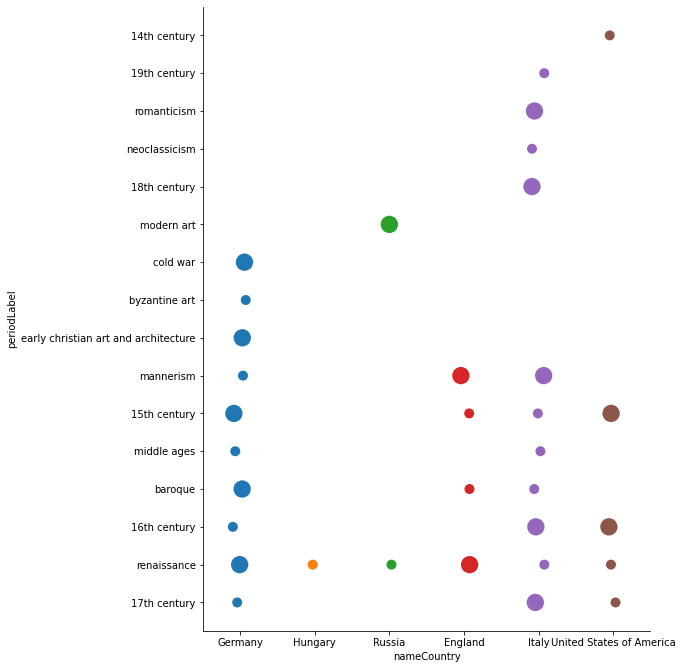

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.catplot(x="nameCountry", y="periodLabel", sizes=(100, 300),data=df, height=9.2)


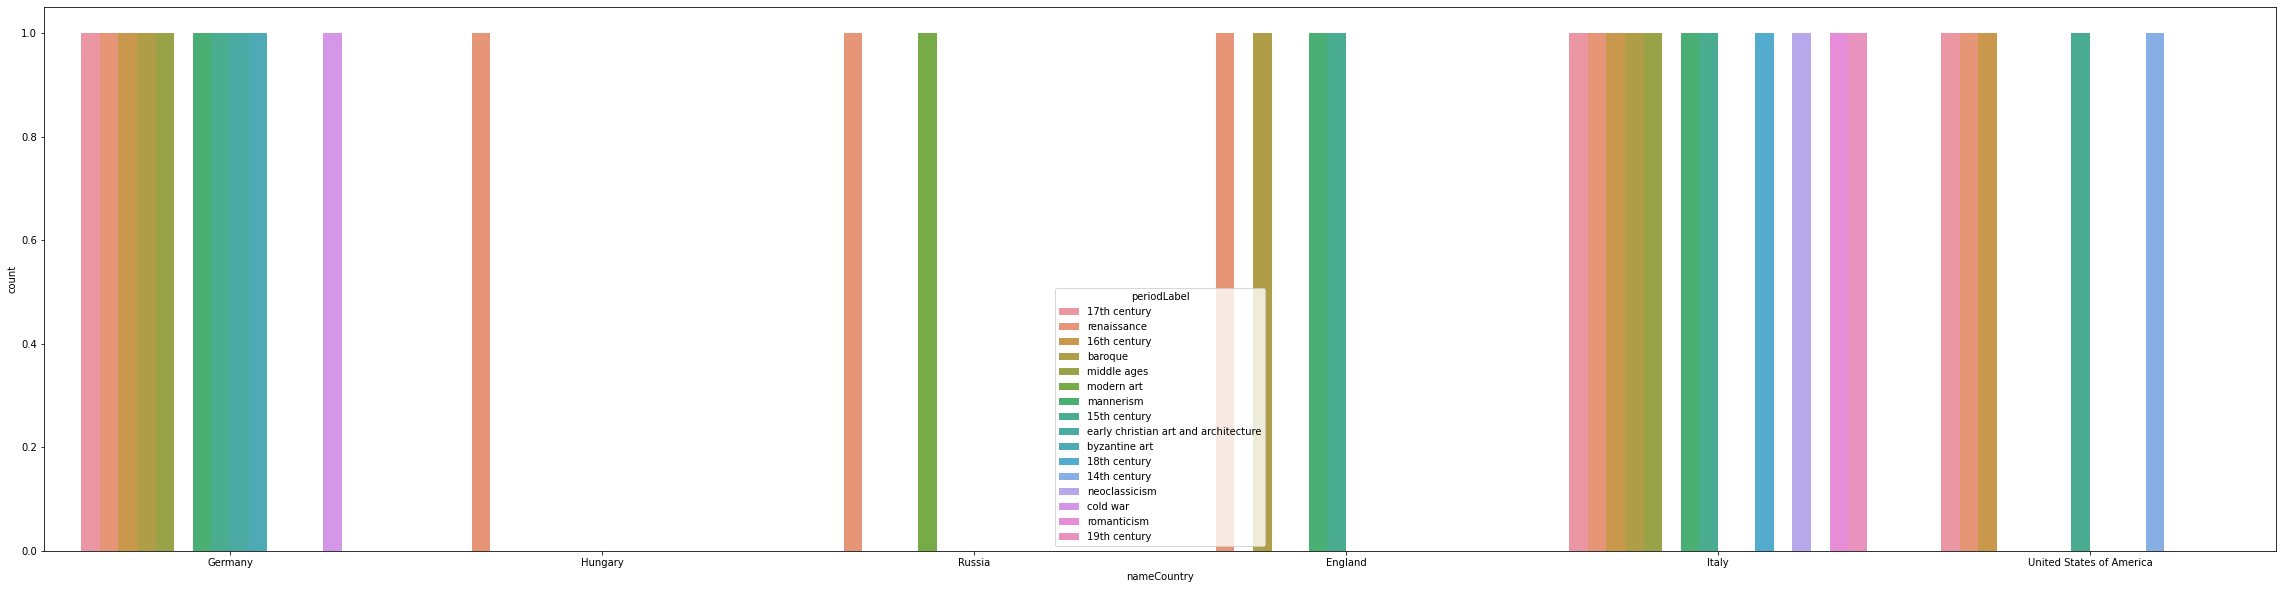

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


fig_dims = (40, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="nameCountry", hue="periodLabel", data=df)

In [53]:
import csv
from collections import defaultdict
import numpy as np
data = {} # final data
with open('countries_his_without_dupes.csv') as csvfile:
    data_periods = [] 
    countries = []
    rows = csv.reader(csvfile, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[0] not in data_periods:
            data_periods.append(row[0]) # create the list of unique periods
        if row[1] not in countries:
            countries.append(row[1]) # create the list of unique periods
    print(data_periods)
    print(countries)
    countries.sort()
    periods_years_zeros_matrix = np.array(np.zeros(( len(countries), len(data_periods) ))) # rows, columns
    
    for i, period in enumerate(data_periods): # loop over periods and their index position  
        for j, country in enumerate(countries):
            with open('countries_his_without_dupes.csv') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[1] == country and row[0] == period:  #????
                        periods_years_zeros_matrix[j][i] = int(periods_years_zeros_matrix[j][i])+1
    
    periods_years_zeros_matrix
    
# put everything together
data["periods"] = data_periods
for i, country in enumerate(countries):
    data[country] = list(periods_years_zeros_matrix[i])
print(data)

['Germany', 'Hungary', 'Russia', 'England', 'Italy', 'United States of America']
['17th century', 'renaissance', '16th century', 'baroque', 'middle ages', 'modern art', 'mannerism', '15th century', 'early christian art and architecture', 'byzantine art', '18th century', '14th century', 'neoclassicism', 'cold war', 'romanticism', '19th century']
{'periods': ['Germany', 'Hungary', 'Russia', 'England', 'Italy', 'United States of America'], '14th century': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0], '15th century': [1.0, 0.0, 0.0, 1.0, 1.0, 1.0], '16th century': [1.0, 0.0, 0.0, 0.0, 1.0, 1.0], '17th century': [1.0, 0.0, 0.0, 0.0, 1.0, 1.0], '18th century': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0], '19th century': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0], 'baroque': [1.0, 0.0, 0.0, 1.0, 1.0, 0.0], 'byzantine art': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'cold war': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'early christian art and architecture': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'mannerism': [1.0, 0.0, 0.0, 1.0, 1.0, 0.0], 'middle ages': [1.

In [54]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge
import random

output_file("bar_period_studied_in_countries.html")

number_of_colors = 16 # pick random colors for the countries
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

#nameCountry = ['Italy', 'United States', 'Germany']
#periodLabel = ['Middle Ages', '16th Century', '15th Century', 'Mannerism', '17th Century', 'Renaissance', '19th Century','18th Century', 'Baroque', 'Bizantine Art', 'Early Christian Art and Architecture', 'Romanticism', '14th Century', 'Cold War', 'Neoclassicism', 'Modern Art']

p = figure(x_range=data_periods, plot_height=650, title="Periods counting by Country",
           toolbar_location=None, tools="hover", tooltips="$name: @$name", width=1500)

p.vbar_stack(countries, x='periods', width=0.8, source=data, legend_label=countries, color=color) 


p.x_range.range_padding = 0.1
p.y_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "vertical"

show(p)

In [57]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

output_file("bar_nested_colormapped_countries.html")

countries = ['Germany', 'Hungary', 'Russia', 'England', 'Italy', 'United States of America']
years = ['neoclassicism', 'mannerism', '16th century', 'modern art', 'middle ages', 'renaissance', 'baroque', '17th century', '18th century', '14th century', '15th century', 'cold war', 'early christian art and architecture', 'byzantine art', '19th century', 'romanticism']

data = {'periods': ['Germany', 'Hungary', 'Russia', 'England', 'Italy', 'United States of America'], '14th century': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0], '15th century': [1.0, 0.0, 0.0, 1.0, 1.0, 1.0], '16th century': [1.0, 0.0, 0.0, 0.0, 1.0, 1.0], '17th century': [1.0, 0.0, 0.0, 0.0, 1.0, 1.0], '18th century': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0], '19th century': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0], 'baroque': [1.0, 0.0, 0.0, 1.0, 1.0, 0.0], 'byzantine art': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'cold war': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'early christian art and architecture': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'mannerism': [1.0, 0.0, 0.0, 1.0, 1.0, 0.0], 'middle ages': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0], 'modern art': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'neoclassicism': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0], 'renaissance': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'romanticism': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0]}

palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (country, year) for country in countries for year in years ]
counts = sum(zip(data['neoclassicism'], data['mannerism'], data['16th century'],data['modern art'], data['middle ages'], data['renaissance'], data['baroque'],data['17th century'],data['18th century'],data['14th century'],data['15th century'],data['cold war'],data['early christian art and architecture'],data['byzantine art'],data['19th century'], data['romanticism']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=650, width=1000, title="Period Counts by Country",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=years, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1.55
p.xgrid.grid_line_color = None

show(p)

